## 04_02: Divide and conquer with Python classes

In [9]:
import math
import matplotlib.pyplot as pp

In [10]:
class Turtle:    
    def __init__(self):
        self.pos = (0,0) # start at origin
        self.angle = 0   # start facing east
        self.pen = True  # start with pen down

    deg = math.pi / 180.0
        
    def forward(self, distance):
        posnew = (self.pos[0] + distance * math.cos(self.deg * self.angle),
                  self.pos[1] + distance * math.sin(self.deg * self.angle))
    
        if self.pen:
            pass
        
        self.pos = posnew

    def back(self, distance):
        self.forward(-distance)
        
    def left(self, angle):
        self.angle = (self.angle + angle) % 360
    
    def right(self, angle):
        self.angle = (self.angle - angle) % 360
    
    def penup(self):
        self.pen = False
    
    def pendown(self):
        self.pen = True
    
class Terrarium:
    def __init__(self):
        pass    

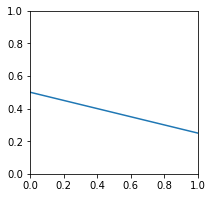

In [14]:
fig = pp.figure(figsize=(3,3))
axes = pp.axes() # This also shows the plot

line = pp.Line2D((0,1), (0.5,0.25)) # Define a line
axes.add_line(line) # add the line and show the plot

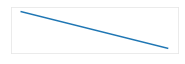

In [15]:
fig = pp.figure(figsize=(3,3))
axes = pp.axes()

line = pp.Line2D((0,1), (0.5,0.25))
axes.add_line(line)

# remove ticks and labels
axes.set_xticks([])
axes.set_yticks([])

# change color of box
for spine in ['bottom','top','left','right']:
    axes.spines[spine].set_color('0.9')

# rescale axes to fit drawing
axes.axis('scaled')

# add a small border
xmin, xmax, ymin, ymax = axes.axis()
dx = (xmax - xmin) / 50
axes.axis([xmin-dx,xmax+dx,ymin-dx,ymax+dx]);  # semicolon avoid printing out object

In [18]:
class Terrarium:
    def __init__(self):
        self.fig = pp.figure(figsize=(3,3))
        self.axes = pp.axes()

        self.axes.set_xticks([])
        self.axes.set_yticks([])

        for spine in ['bottom','top','left','right']:
            self.axes.spines[spine].set_color('0.9')

    def rescale(self):
        self.axes.axis('scaled')

        xmin, xmax, ymin, ymax = self.axes.axis()
        dx = (xmax - xmin) / 50
        self.axes.axis([xmin-dx,xmax+dx,ymin-dx,ymax+dx])        

In [19]:
class Turtle:    
    def __init__(self, terrarium):   # add terrarium argument to initializer
        self.pos = (0,0)
        self.angle = 0
        self.pen = True
        
        self.axes = terrarium.axes   # store axes in instance attribute
    
    deg = math.pi / 180.0
    
    def forward(self, distance):
        posnew = (self.pos[0] + distance * math.cos(self.deg * self.angle),
                  self.pos[1] + distance * math.sin(self.deg * self.angle))
    
        if self.pen:
            # if pen is down, add line to the axes 
            line = pp.Line2D((self.pos[0],posnew[0]), (self.pos[1],posnew[1]))
            self.axes.add_line(line)
        
        self.pos = posnew
    
    def back(self, distance):
        self.forward(-distance)
    
    def left(self, angle):
        self.angle = (self.angle + angle) % 360
    
    def right(self, angle):
        self.angle = (self.angle - angle) % 360
    
    def penup(self):
        self.pen = False
    
    def pendown(self):
        self.pen = True

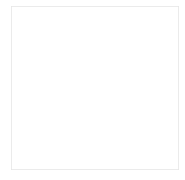

In [20]:
t = Terrarium()

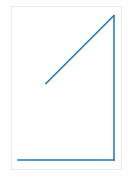

In [21]:
t = Terrarium()

t1 = Turtle(t)

t1.forward(100)
t1.left(90)
t1.forward(150)
t1.right(45)
t1.back(100)

t.rescale()